## Installing and Importing  needed libraries


In [3]:
pip install -U homeharvest


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 660.6 kB/s eta 0:00:15
    --------------------------------------- 0.1/9.8 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.2/9.8 MB 2.5 MB/s eta 0:00:04
   - -------------------------------------- 0.3/9.8 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.3/9.8 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.3/9.8 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.3/9.8 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.3/9.8 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.3/9.8 MB 1.6 MB/s eta 0:00:06
   - -------------------------------------- 0.3/9.8 MB 746.0 kB/s eta 0:00:13
   --- ------------------------------------ 0.7/9.8 MB 1.5 MB/s eta 0:00:07
   ----- ---------------------------------- 1.3/9.8 MB 2.3 MB/s eta 0:00:04
   ------- ----

In [39]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   --------------------------- ------------ 204.8/294.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
from homeharvest import scrape_property
from datetime import datetime
import numpy as np
import pandas as pd 
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Getting data 

## The data is gathered from a git hub repository using scrap property from library homeharvest.
## repo link : https://github.com/Bunsly/HomeHarvest
## Website link: https://www.bunsly.com/demo/homeharvest


In [203]:
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")

filename = "HomeHarvest" + current_time
type = "for_sale"
property = scrape_property(
    location="Dallas, TX",
    listing_type=type,
    past_days =60,
    
)
name = filename+"_"+type+".csv" 
print(len(property))
property.to_csv(name, index=False)

property = pd.read_csv(name)


2067


In [210]:
property = pd.read_csv(name)

In [211]:

property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_url     2067 non-null   object 
 1   mls              2067 non-null   object 
 2   mls_id           2067 non-null   object 
 3   status           2067 non-null   object 
 4   text             2042 non-null   object 
 5   style            2067 non-null   object 
 6   street           2066 non-null   object 
 7   unit             429 non-null    object 
 8   city             2067 non-null   object 
 9   state            2067 non-null   object 
 10  zip_code         2067 non-null   int64  
 11  beds             1889 non-null   float64
 12  full_baths       1885 non-null   float64
 13  half_baths       855 non-null    float64
 14  sqft             1891 non-null   float64
 15  year_built       1904 non-null   float64
 16  days_on_mls      2061 non-null   float64
 17  list_price    

# Removing unwanted columns


In [212]:

property= property[['city','style','beds','full_baths','half_baths','sqft','year_built','list_price','stories','hoa_fee',
 'parking_garage',
 'nearby_schools']]

list(property.columns)

['city',
 'style',
 'beds',
 'full_baths',
 'half_baths',
 'sqft',
 'year_built',
 'list_price',
 'stories',
 'hoa_fee',
 'parking_garage',
 'nearby_schools']

# handeling null values

In [213]:
property.isnull().sum()

city                 0
style                0
beds               178
full_baths         182
half_baths        1212
sqft               176
year_built         163
list_price           0
stories            183
hoa_fee             57
parking_garage     710
nearby_schools      11
dtype: int64

In [215]:
property.dropna(subset=['full_baths'], inplace=True)
property.dropna(subset=['sqft'], inplace=True)
property.dropna(subset=['year_built'], inplace=True)
property['half_baths'] = property['half_baths'].fillna(0)
property['parking_garage'] = property['parking_garage'].fillna(0)
property['hoa_fee'] = property['hoa_fee'].fillna(0)
property['stories'] = property['stories'].fillna(0)
property['nearby_schools'] = property['nearby_schools'].fillna('')



In [216]:
property.isnull().sum()

city              0
style             0
beds              0
full_baths        0
half_baths        0
sqft              0
year_built        0
list_price        0
stories           0
hoa_fee           0
parking_garage    0
nearby_schools    0
dtype: int64

In [217]:
property.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1866 entries, 0 to 2066
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            1866 non-null   object 
 1   style           1866 non-null   object 
 2   beds            1866 non-null   float64
 3   full_baths      1866 non-null   float64
 4   half_baths      1866 non-null   float64
 5   sqft            1866 non-null   float64
 6   year_built      1866 non-null   float64
 7   list_price      1866 non-null   int64  
 8   stories         1866 non-null   float64
 9   hoa_fee         1866 non-null   float64
 10  parking_garage  1866 non-null   float64
 11  nearby_schools  1866 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 189.5+ KB


## Creating number of schools from count of commas in nearby schools

In [218]:

property['num_schools'] = property['nearby_schools'].str.count(',') + 1


## Converting year_built to house age

In [221]:

current_year =int(datetime.now().year)
property['house_age'] = current_year - property['year_built'].astype(int)


In [222]:
property.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1866 entries, 0 to 2066
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            1866 non-null   object 
 1   style           1866 non-null   object 
 2   beds            1866 non-null   int32  
 3   full_baths      1866 non-null   int32  
 4   half_baths      1866 non-null   float64
 5   sqft            1866 non-null   int32  
 6   year_built      1866 non-null   float64
 7   list_price      1866 non-null   int64  
 8   stories         1866 non-null   float64
 9   hoa_fee         1866 non-null   float64
 10  parking_garage  1866 non-null   float64
 11  nearby_schools  1866 non-null   object 
 12  num_schools     1866 non-null   int64  
 13  house_age       1866 non-null   int32  
dtypes: float64(5), int32(4), int64(2), object(3)
memory usage: 189.5+ KB


# EDA analysis


In [223]:
property.describe().T


,count,mean,std,min,25%,50%,75%,max
beds,1866.0,3.192926e+00,1.250104e+00,0.0,2.0,3.0,4.0,18.0
full_baths,1866.0,2.452840e+00,1.267949e+00,1.0,2.0,2.0,3.0,18.0
half_baths,1866.0,5.230439e-01,6.620745e-01,0.0,0.0,0.0,1.0,6.0
sqft,1866.0,2.436214e+03,2.071535e+03,423.0,1330.0,1908.0,2852.0,41600.0
year_built,1866.0,1.983228e+03,3.018112e+01,1906.0,1960.0,1981.0,2015.0,2025.0
list_price,1866.0,1.021401e+06,1.966227e+06,5000.0,305900.0,507500.0,929000.0,47000000.0
stories,1866.0,2.258842e+00,3.705657e+00,0.0,1.0,2.0,2.0,42.0
hoa_fee,1866.0,1.705011e+02,4.791844e+02,0.0,0.0,0.0,172.0,9861.0
parking_garage,1866.0,1.445338e+00,1.080394e+00,0.0,0.0,2.0,2.0,8.0
num_schools,1866.0,2.322079e+00,9.079424e-01,1.0,2.0,2.0,3.0,5.0


Text(0, 0.5, 'Frequency')

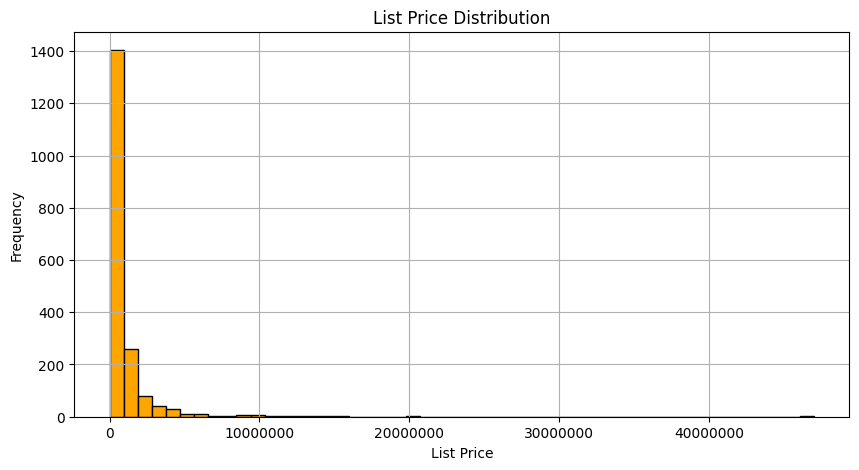

In [224]:
plt.ticklabel_format(style='plain')
property['list_price'].hist(bins=50, figsize=(10,5), color='orange', edgecolor='black')
plt.title('List Price Distribution')
plt.xlabel('List Price')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

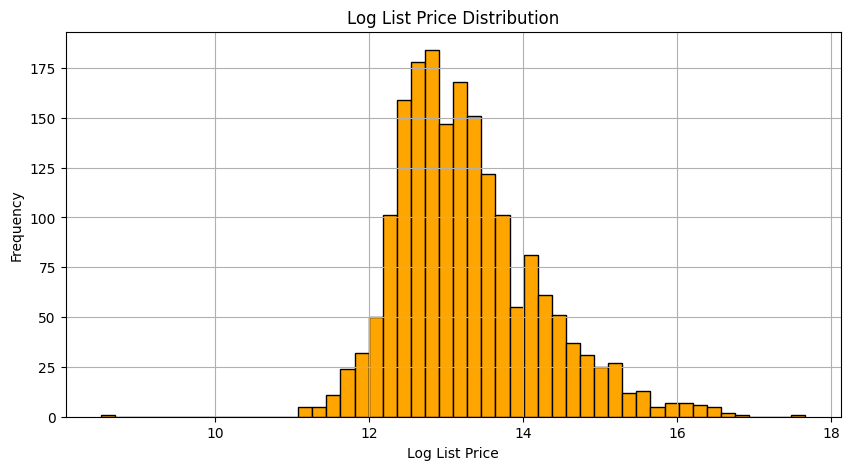

In [225]:
property['price_log'] = np.log(property['list_price'])
property['price_log'].hist(bins=50, figsize=(10,5), color='orange',edgecolor='black')
plt.title('Log List Price Distribution')
plt.xlabel('Log List Price')
plt.ylabel('Frequency')


Text(0.5, 1.0, 'Price of different style of houses')

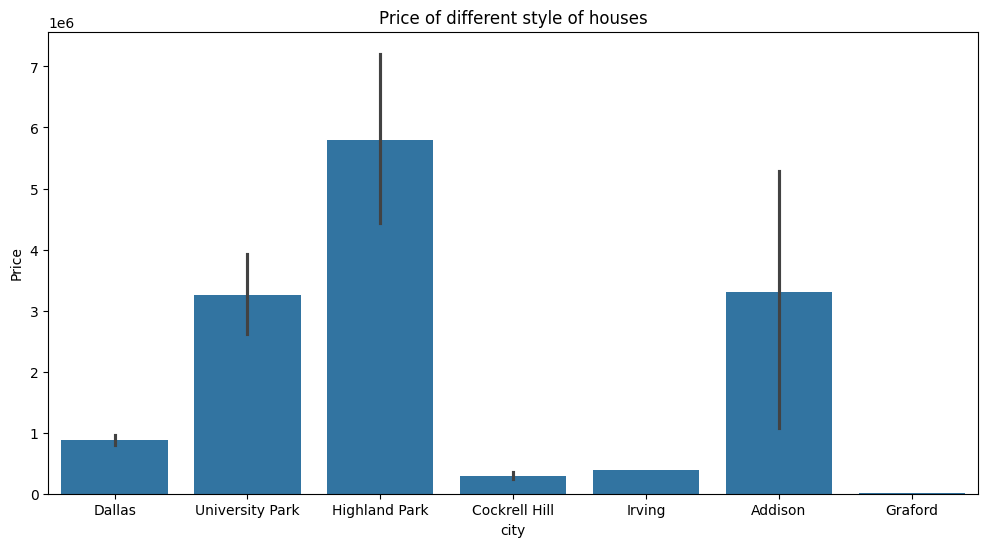

In [226]:
#graph of different price of different style of houses
plt.figure(figsize=(12,6))
sn.barplot(x='city', y='list_price', data=property)
plt.xlabel('city')
plt.ylabel('Price')
plt.title('Price of different City of houses')

Text(0.5, 1.0, 'Price of different style of houses')

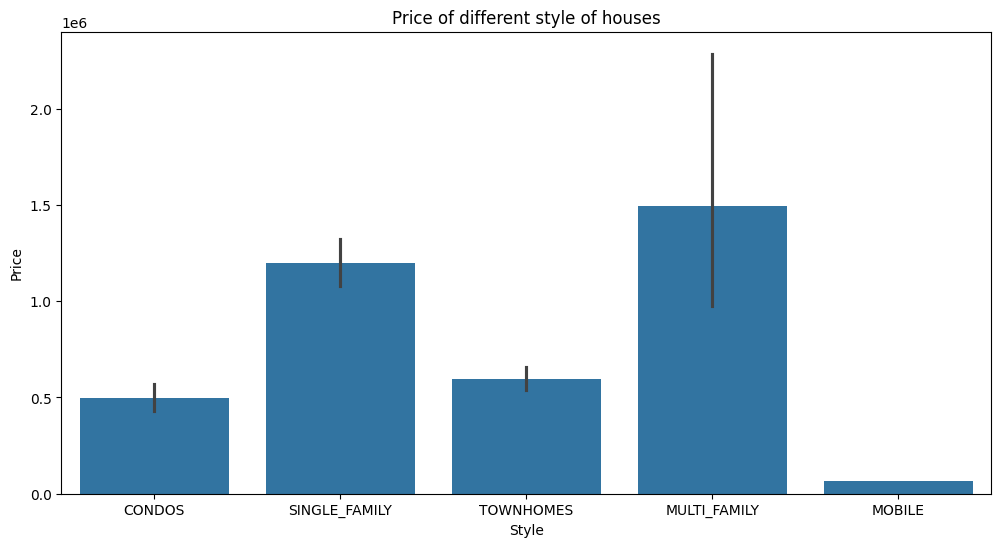

In [227]:
plt.figure(figsize=(12,6))
sn.barplot(x='style', y='list_price', data=property)
plt.xlabel('Style')
plt.ylabel('Price')
plt.title('Price of different style of houses')

# Adding dummy variable for Style and City.


In [228]:
property['city'].unique()
# creating dummy variables for style
property = pd.get_dummies(property, columns=['city'], drop_first=True)
property['style'].unique()
# creating dummy variables for style
property = pd.get_dummies(property, columns=['style'], drop_first=True)

for column in property.columns:
    if property[column].dtype == bool:
        property[column] = property[column].astype(int)
property.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1866 entries, 0 to 2066
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   beds                  1866 non-null   int32  
 1   full_baths            1866 non-null   int32  
 2   half_baths            1866 non-null   float64
 3   sqft                  1866 non-null   int32  
 4   year_built            1866 non-null   float64
 5   list_price            1866 non-null   int64  
 6   stories               1866 non-null   float64
 7   hoa_fee               1866 non-null   float64
 8   parking_garage        1866 non-null   float64
 9   nearby_schools        1866 non-null   object 
 10  num_schools           1866 non-null   int64  
 11  house_age             1866 non-null   int32  
 12  price_log             1866 non-null   float64
 13  city_Cockrell Hill    1866 non-null   int32  
 14  city_Dallas           1866 non-null   int32  
 15  city_Graford          1866

<Axes: >

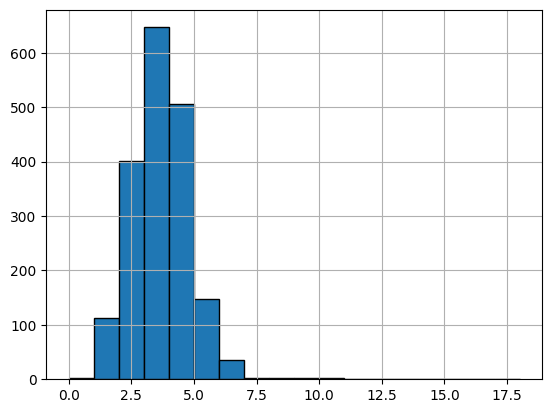

In [229]:
property['beds'].hist(bins=18,edgecolor='black')

## Converting beds to 3 dummy variables.

In [230]:
#if beds is 2 1 then beds_2 is 1 else 0 if beds is 3 then beds_3 is 1 else 0 and if beds is more than 4 then beds_above is 1 else 0

property['beds_2'] = property.apply(lambda row: 1 if row['beds'] == 2 else 0, axis=1)
property['beds_3'] = property.apply(lambda row: 1 if row['beds'] == 3 else 0, axis=1)
property['beds_above'] = property.apply(lambda row: 1 if row['beds'] > 3 else 0, axis=1)

array([[<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'full_baths'}>,
        <Axes: title={'center': 'half_baths'}>,
        <Axes: title={'center': 'sqft'}>,
        <Axes: title={'center': 'year_built'}>],
       [<Axes: title={'center': 'list_price'}>,
        <Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'hoa_fee'}>,
        <Axes: title={'center': 'parking_garage'}>,
        <Axes: title={'center': 'num_schools'}>],
       [<Axes: title={'center': 'house_age'}>,
        <Axes: title={'center': 'price_log'}>,
        <Axes: title={'center': 'city_Cockrell Hill'}>,
        <Axes: title={'center': 'city_Dallas'}>,
        <Axes: title={'center': 'city_Graford'}>],
       [<Axes: title={'center': 'city_Highland Park'}>,
        <Axes: title={'center': 'city_Irving'}>,
        <Axes: title={'center': 'city_University Park'}>,
        <Axes: title={'center': 'style_MOBILE'}>,
        <Axes: title={'center': 'style_MULTI_FAMILY'}>],
       [<Ax

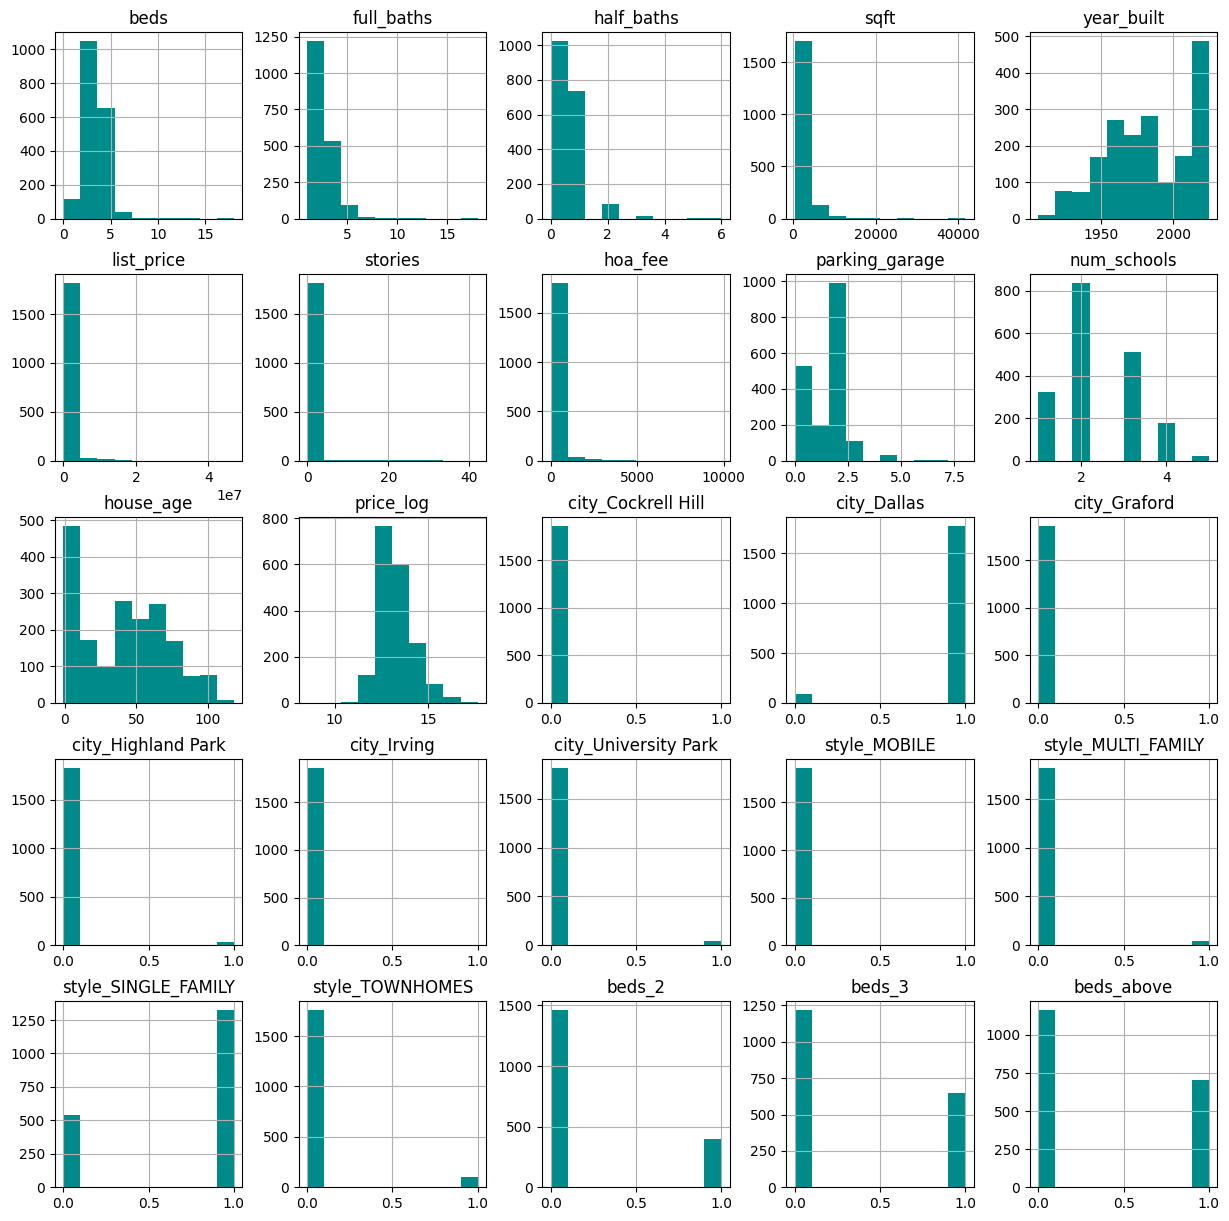

In [231]:

property.hist(figsize = (15,15),color='darkCyan')


In [232]:
property.drop(['nearby_schools','year_built'], axis=1, inplace=True)

## Correlation matrix

<Axes: >

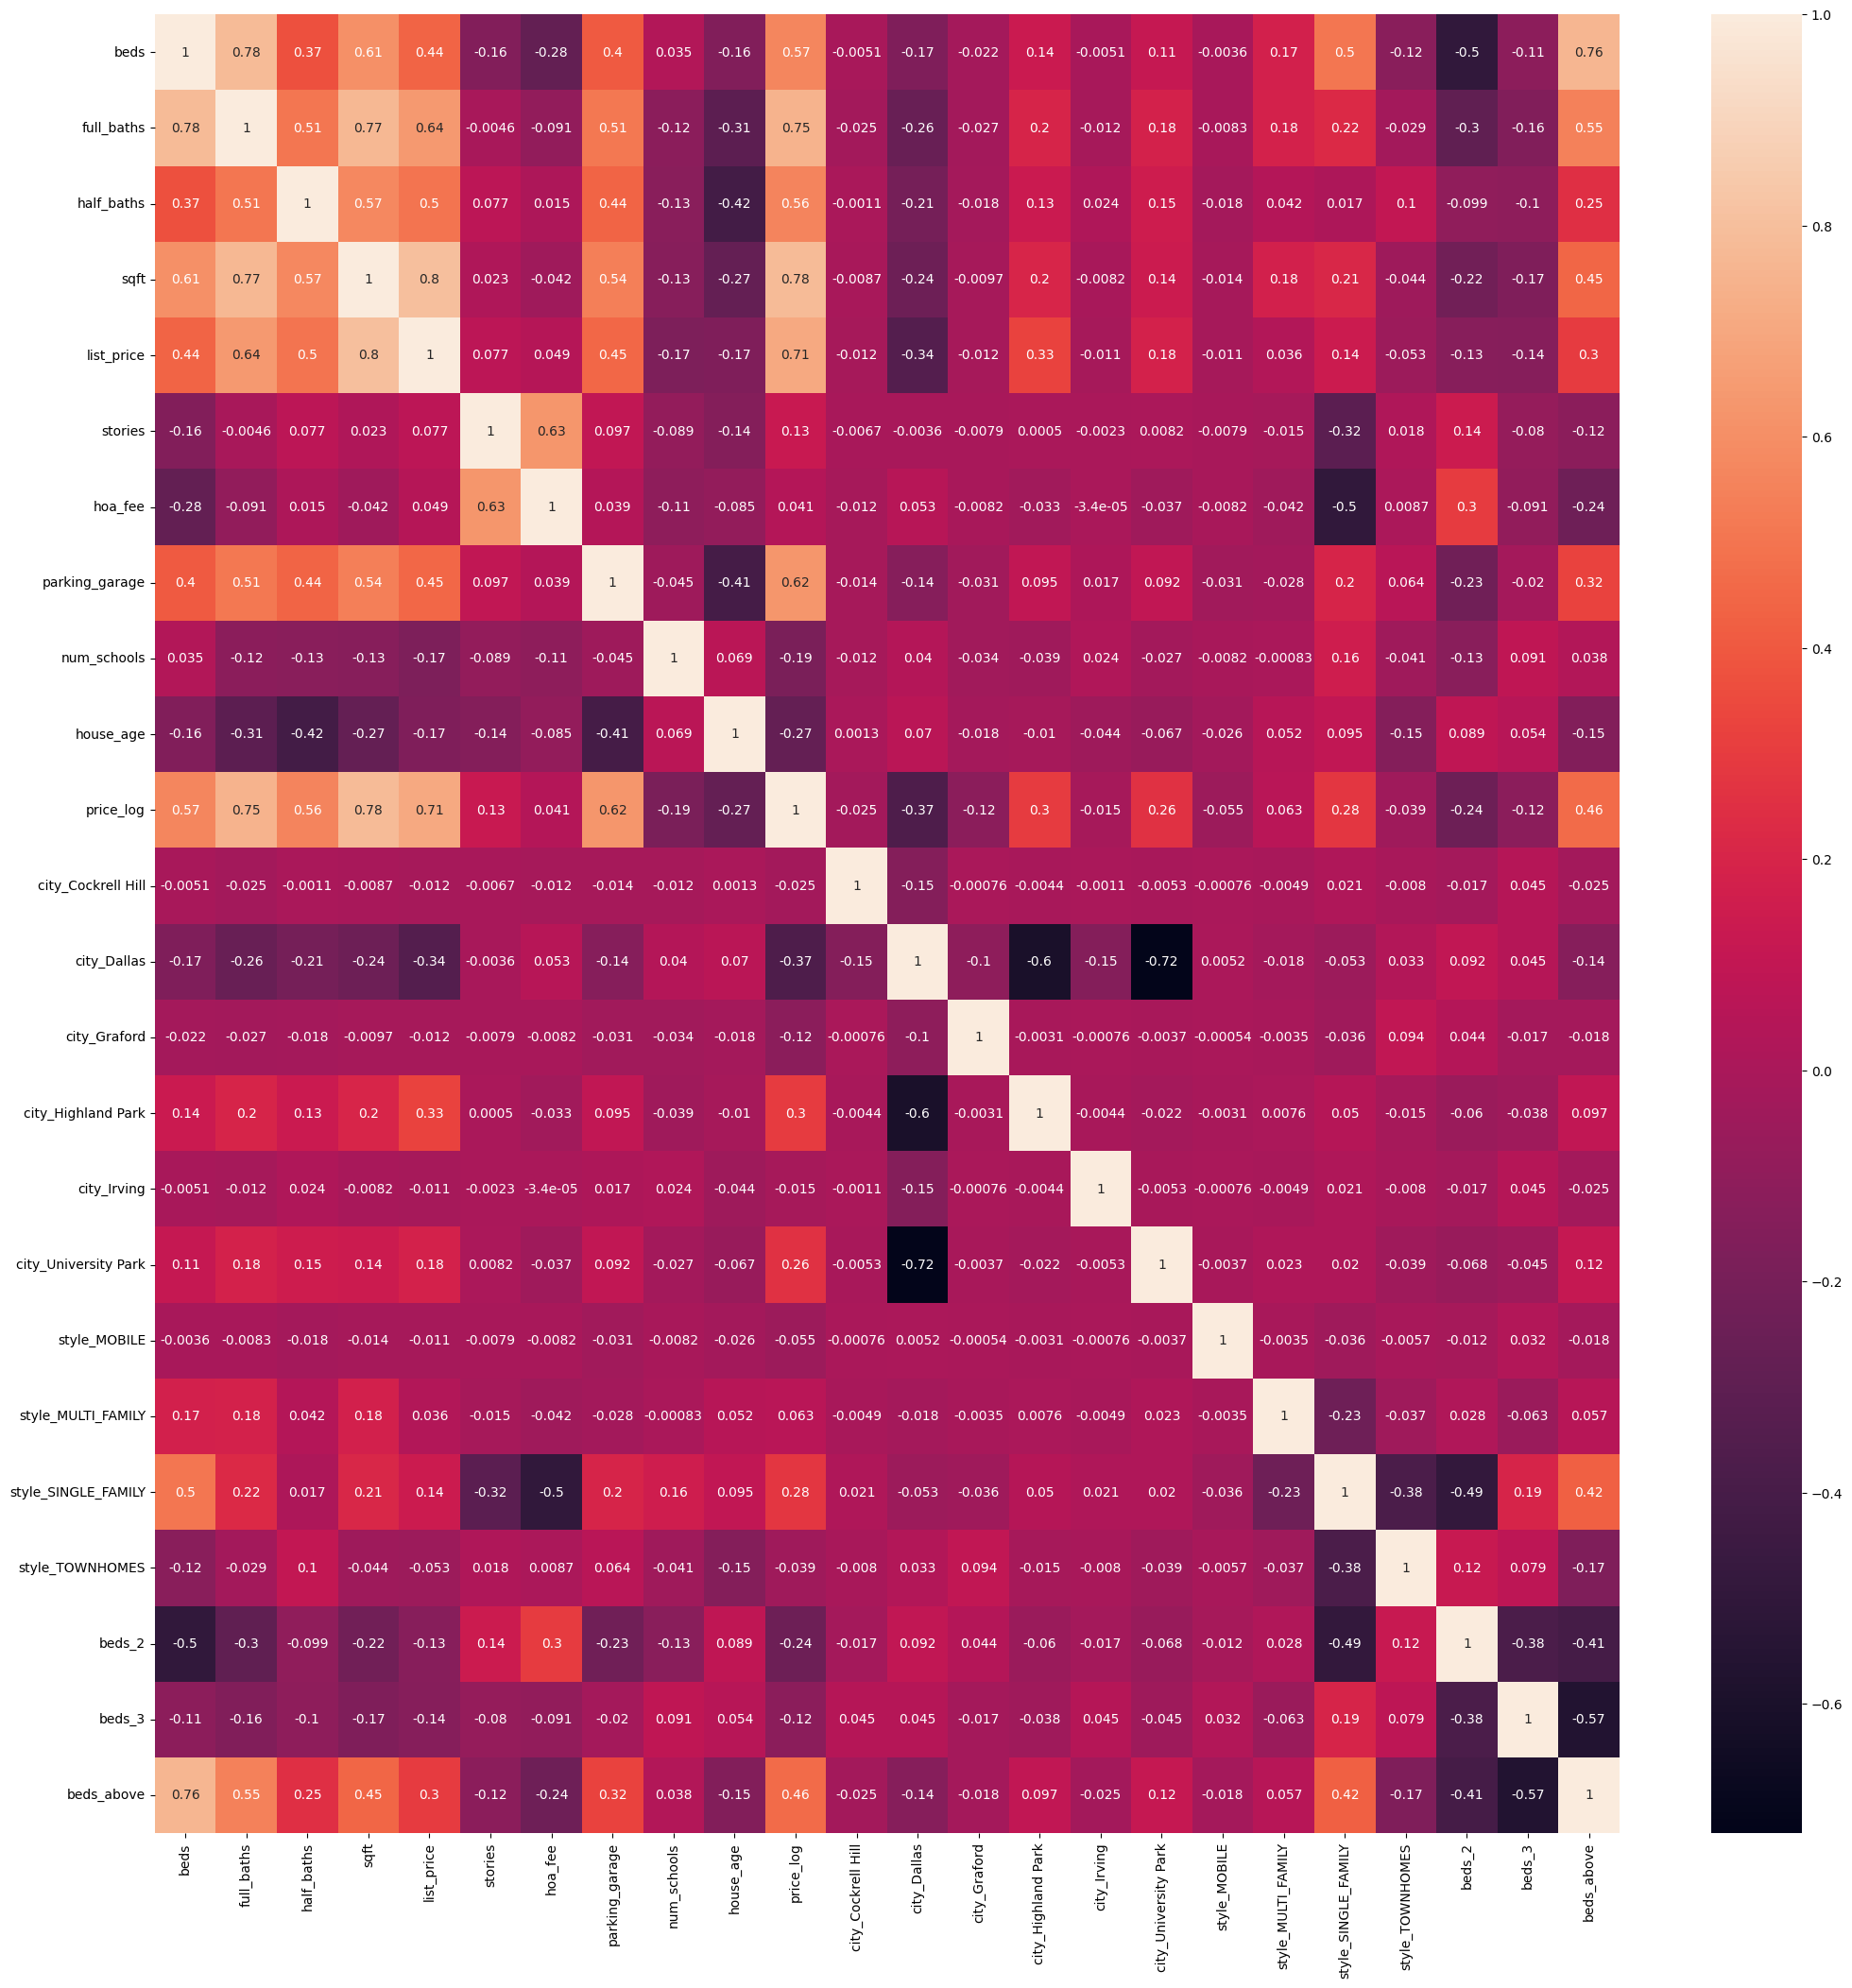

In [233]:

plt.figure(figsize=(25, 25))
sn.heatmap(property.corr(), annot=True)

In [234]:
property.columns

Index(['beds', 'full_baths', 'half_baths', 'sqft', 'list_price', 'stories',
       'hoa_fee', 'parking_garage', 'num_schools', 'house_age', 'price_log',
       'city_Cockrell Hill', 'city_Dallas', 'city_Graford',
       'city_Highland Park', 'city_Irving', 'city_University Park',
       'style_MOBILE', 'style_MULTI_FAMILY', 'style_SINGLE_FAMILY',
       'style_TOWNHOMES', 'beds_2', 'beds_3', 'beds_above'],
      dtype='object')

# Regression Analysis


<Axes: >

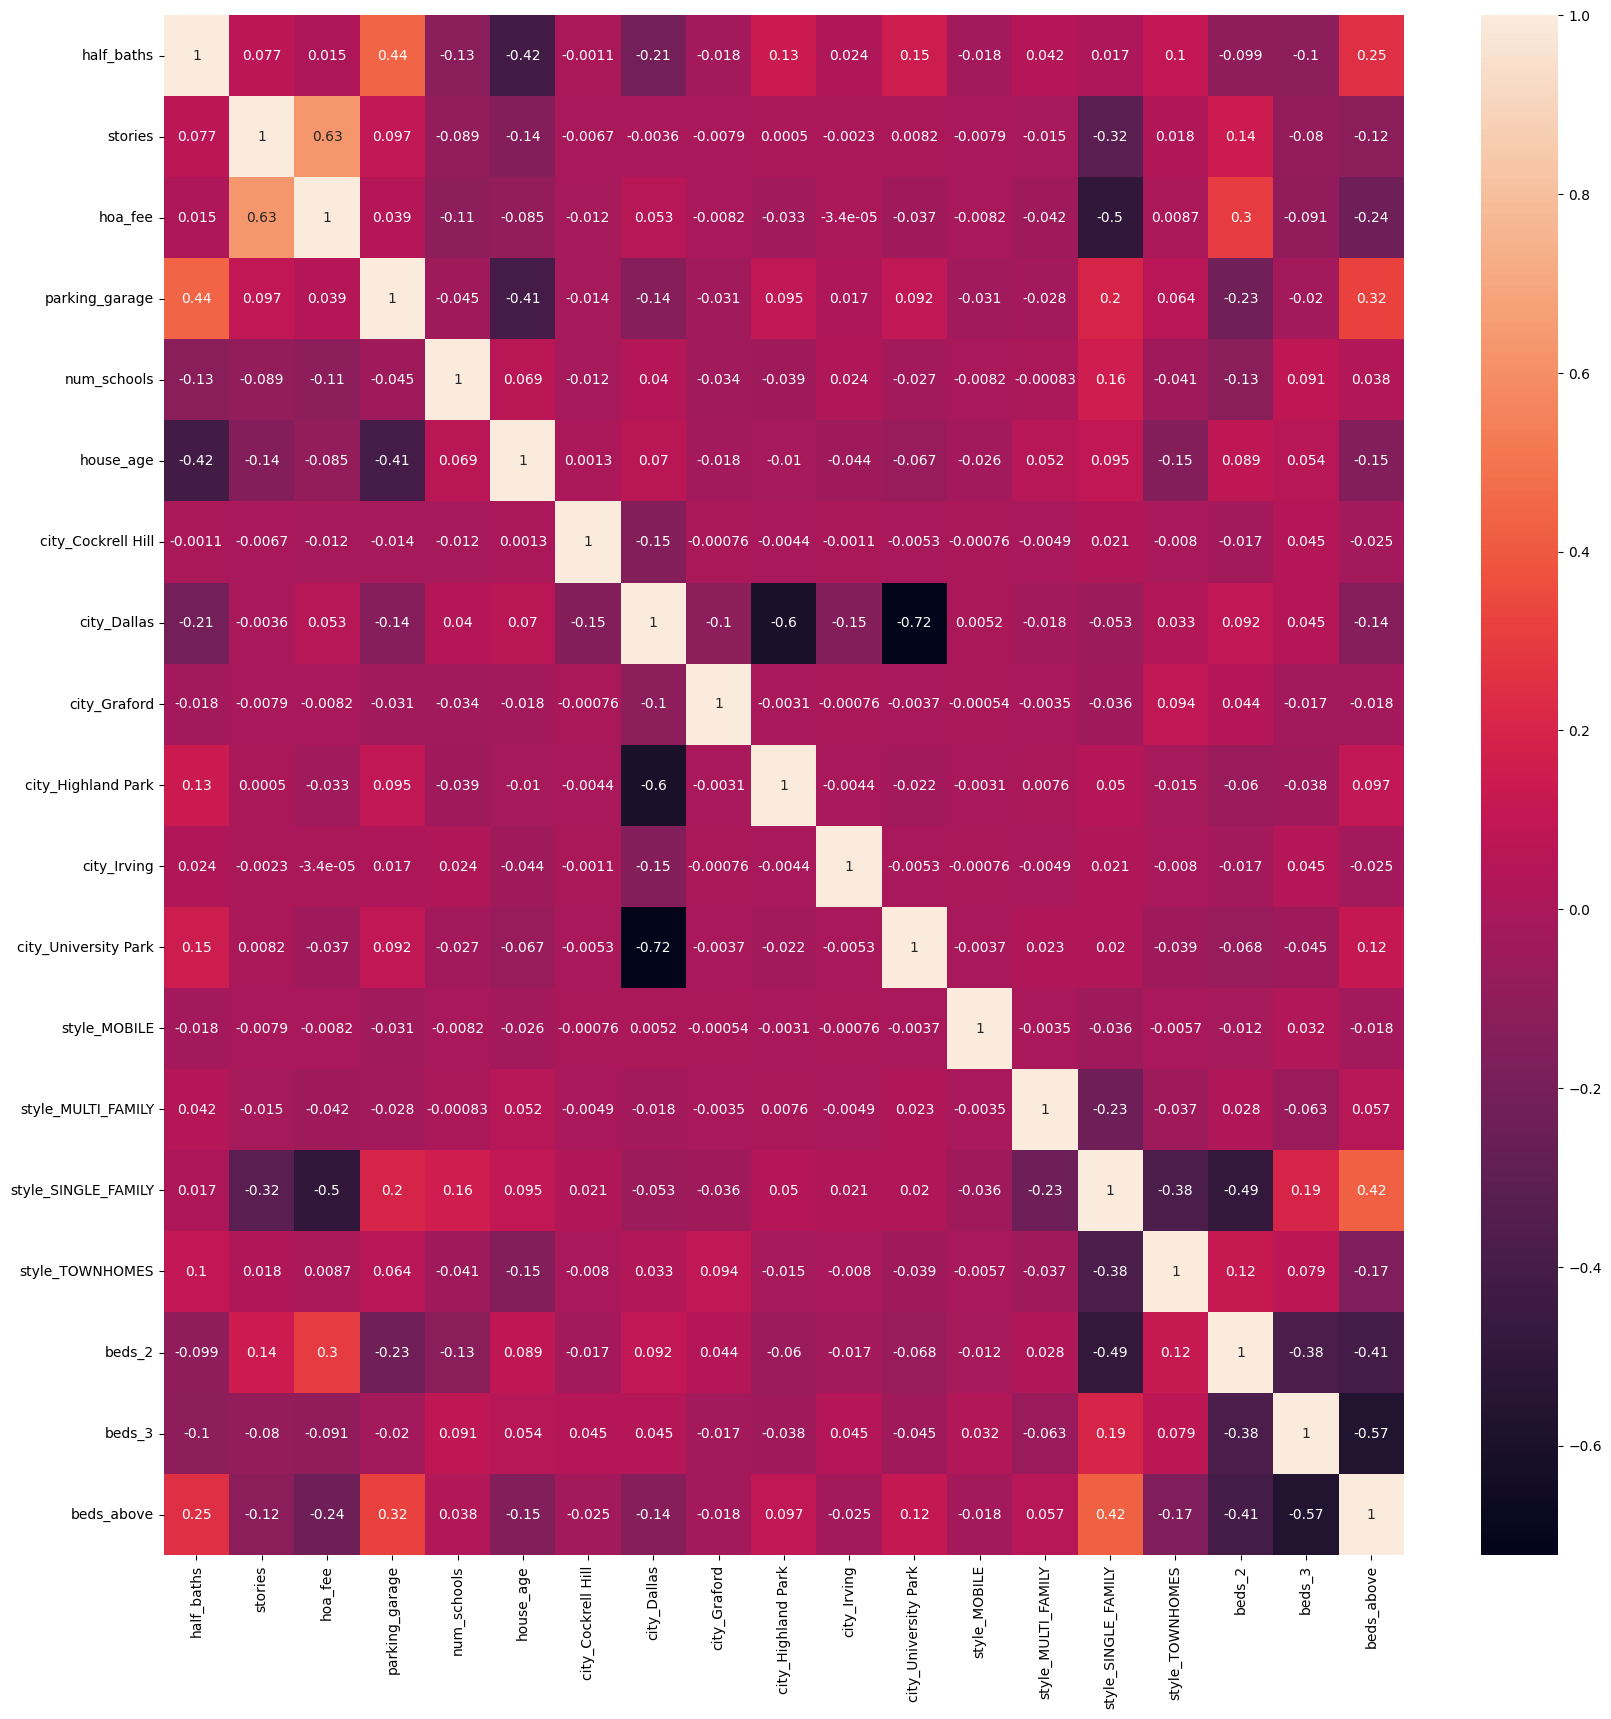

In [260]:
X = property.drop(['beds', 'full_baths','sqft','list_price','price_log'],axis=1)
plt.figure(figsize=(20, 20))
sn.heatmap(X.corr(), annot=True)

In [252]:
property.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1866 entries, 0 to 2066
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   beds                  1866 non-null   int32  
 1   full_baths            1866 non-null   int32  
 2   half_baths            1866 non-null   float64
 3   sqft                  1866 non-null   int32  
 4   list_price            1866 non-null   int64  
 5   stories               1866 non-null   float64
 6   hoa_fee               1866 non-null   float64
 7   parking_garage        1866 non-null   float64
 8   num_schools           1866 non-null   int64  
 9   house_age             1866 non-null   int32  
 10  price_log             1866 non-null   float64
 11  city_Cockrell Hill    1866 non-null   int32  
 12  city_Dallas           1866 non-null   int32  
 13  city_Graford          1866 non-null   int32  
 14  city_Highland Park    1866 non-null   int32  
 15  city_Irving           1866

In [258]:
y = property['price_log']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     221.6
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        22:58:54   Log-Likelihood:                -1396.4
No. Observations:                1866   AIC:                             2833.
Df Residuals:                    1846   BIC:                             2943.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.5158      0.307     40.717      0.000      11.913      13.119
half_baths               0.3831      0.022     17.665      0.000       0.341       0.426
stories                  0.0198      0.004      4.715      0.000       0.012       0.028
hoa_fee                  0.0003   3.76e-05      8.085      0.000       0.000       0.000
parking_garage           0.2816      0.014     20.280      0.000       0.254       0.309
num_schools             -0.1575      0.013    -11.670      0.000      -0.184      -0.131
house_age                0.0010      0.000      2.084      0.037    5.76e-05       0.002
city_Cockrell Hill      -0.9815      0.471     -2.083      0.037      -1.905      -0.058
city_Dallas             -0.4648      0.299     -1.555      0.120      -1.051       0.121
city_Graford            -4.3656      0.599     -7.284      0.000      -5.541      -3.190
city_Highland Park       0.9345      0.311      3.005      0.003       0.325       1.544
city_Irving             -1.0333      0.471     -2.196      0.028      -1.956      -0.110
city_University Park     0.4931      0.307      1.605      0.109      -0.109       1.096
style_MOBILE            -0.9976      0.517     -1.929      0.054      -2.012       0.017
style_MULTI_FAMILY       0.6694      0.093      7.196      0.000       0.487       0.852
style_SINGLE_FAMILY      0.4886      0.052      9.333      0.000       0.386       0.591
style_TOWNHOMES          0.2078      0.064      3.251      0.001       0.082       0.333
beds_2                   0.2803      0.058      4.831      0.000       0.166       0.394
beds_3                   0.3247      0.067      4.853      0.000       0.193       0.456
beds_above               0.6747      0.071      9.499      0.000       0.535       0.814
==============================================================================
Omnibus:                       82.536   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.023
Skew:                           0.420   Prob(JB):                     1.05e-25
Kurtosis:                       3.880   Cond. No.                     3.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Interpretation


In [280]:
# Given feature values
coef = dict(model.params)
parameter = list(coef.keys())
beta = list(coef.values())


# values of house with 2 beds, 2 full baths, 2000 sqft, 1 story, 0 half baths, 0 garage, 0 hoa fee, 1 school, 1 city, 1 style

for i in range(len(parameter)):
    if parameter[i] != 'const':
        if beta[i] < 0:
            change = 'decrease'
        else:
            change = 'increase'
        if parameter[i].find('city') != 0 and parameter[i].find('style') !=0 :
            print("for increase in", parameter[i], "by 1, the price will ",change," by ", round(abs(beta[i]*100),2) ,"%")
        else:
            print("for house in", parameter[i], "the price will ",change," by ", round(abs(beta[i]*100),2) ,"%")
            


for increase in half_baths by 1, the price will  increase  by  38.31 %
for increase in stories by 1, the price will  increase  by  1.98 %
for increase in hoa_fee by 1, the price will  increase  by  0.03 %
for increase in parking_garage by 1, the price will  increase  by  28.16 %
for increase in num_schools by 1, the price will  decrease  by  15.75 %
for increase in house_age by 1, the price will  increase  by  0.1 %
for house in city_Cockrell Hill the price will  decrease  by  98.15 %
for house in city_Dallas the price will  decrease  by  46.48 %
for house in city_Graford the price will  decrease  by  436.56 %
for house in city_Highland Park the price will  increase  by  93.45 %
for house in city_Irving the price will  decrease  by  103.33 %
for house in city_University Park the price will  increase  by  49.31 %
for house in style_MOBILE the price will  decrease  by  99.76 %
for house in style_MULTI_FAMILY the price will  increase  by  66.94 %
for house in style_SINGLE_FAMILY the price